# Image Classification on Food 101

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SaadRasheed-exe/Image-Classification-on-Food-101/blob/master)

This project aims to classify images in the [Food 101 Dataset.][]


[Food 101 Dataset.]: https://www.kaggle.com/datasets/dansbecker/food-101 "Kaggle"



## Imports and Downloads

In [2]:
!wget https://raw.githubusercontent.com/SaadRasheed-exe/Image-Classification-on-Food-101/master/helper.py

--2022-08-23 16:02:28--  https://raw.githubusercontent.com/SaadRasheed-exe/Image-Classification-on-Food-101/master/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5713 (5.6K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   5.58K  --.-KB/s    in 0s      

2022-08-23 16:02:28 (75.6 MB/s) - ‘helper.py’ saved [5713/5713]



In [3]:
# imports all the required libraries
execfile('helper.py')
from helper import *

### Download Dataset from Kaggle

Upload your [Kaggle API Token.][]

[Kaggle API Token.]: https://www.kaggle.com/docs/api "Kaggle"

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saadrasheedexe","key":"caedd5244fda903df67d2077b973975d"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dansbecker/food-101
!unzip ./food-101

Streaming output truncated to the last 5000 lines.
  inflating: food-101/food-101/images/tacos/1030289.jpg  
  inflating: food-101/food-101/images/tacos/1033196.jpg  
  inflating: food-101/food-101/images/tacos/1036030.jpg  
  inflating: food-101/food-101/images/tacos/1042175.jpg  
  inflating: food-101/food-101/images/tacos/1044043.jpg  
  inflating: food-101/food-101/images/tacos/1058697.jpg  
  inflating: food-101/food-101/images/tacos/1059239.jpg  
  inflating: food-101/food-101/images/tacos/1059326.jpg  
  inflating: food-101/food-101/images/tacos/1066762.jpg  
  inflating: food-101/food-101/images/tacos/1070967.jpg  
  inflating: food-101/food-101/images/tacos/1073468.jpg  
  inflating: food-101/food-101/images/tacos/1075296.jpg  
  inflating: food-101/food-101/images/tacos/1085243.jpg  
  inflating: food-101/food-101/images/tacos/108529.jpg  
  inflating: food-101/food-101/images/tacos/1086014.jpg  
  inflating: food-101/food-101/images/tacos/108945.jpg  
  inflating: food-101/f

## Data Exploration

In [ ]:
os.listdir('./food-101')

['food-101', '__MACOSX']

In [ ]:
os.listdir('./food-101/food-101')

['.DS_Store', 'license_agreement.txt', 'images', 'meta', 'README.txt']

In [10]:
dataset_dir = './food-101/food-101'

**images** contains 101 folders, each with a 1000 images.\
Each folder represents a class of food.

In [11]:
for dirpath, dirnames, filenames in os.walk(dataset_dir):
    print(f"There are {len(filenames)} files and {len(dirnames)} directories in {dirpath}.")

In [ ]:
os.listdir(os.path.join(dataset_dir, 'meta'))

['test.txt',
 'test.json',
 'train.json',
 'train.txt',
 'classes.txt',
 'labels.txt']

**train.json** contains the names of images belonging to the training set.\
**test.json** contains the names of images belonging to the validation set.

In [ ]:
pd.read_json(dataset_dir + '/meta/train.json').head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150


## Preprocessing Data into Training and Testing Sets

In [12]:
# path to training and testing images stored together
image_dir = os.path.join(dataset_dir, 'images')

# paths for preprocessed data
data_dir = './data'
train_data_dir = './data/train/'
test_data_dir = './data/test/'

ext = '.jpg'
json_df = {'train': pd.read_json('./food-101/food-101/meta/train.json'), 'test': pd.read_json('./food-101/food-101/meta/test.json')}
labels = json_df['train'].columns

In [13]:
# Create directories and sub-directories for processed data
for split in ['train', 'test']:
    for label in labels:
        final_path = os.path.join(data_dir, split, label)
        os.makedirs(final_path)

In [14]:
global_split = 'train'

# function to move files into train and test folders in data
def move_to_folder(entry):
    if type(entry) == pd.core.series.Series:
        entry.apply(move_to_folder)
    else:
        shutil.move(os.path.join(image_dir, entry + ext), os.path.join(data_dir, global_split, entry.split('/')[0]))
    return entry

In [ ]:
# moving all images to their respective sub-directories
for split in ['train', 'test']:
    global_split = split
    json_df[split].apply(move_to_folder)

## Data Visualization

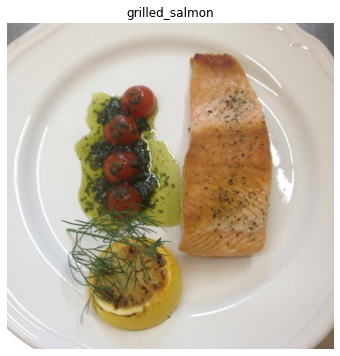

In [47]:
# display random images from the training set
view_random_image(data_dir=data_dir, labels=labels, split='train')

## **Model Experimentations**

In [45]:
# Image size that can be fed to the model (height into width)
IMG_SIZE = (224, 224)

# Color channels of the images (RGB)
COLOR_CHNLS = 3

# batch size for minibatches
BATCH_SIZE = 32

# Number of epochs to train on.
EPOCHS = 20

### Creating a subset (4 classes) of the data for experimenting

In [ ]:
# number of labels to choose
n_classes = 4

# choosing 4 random labels
mini_labels = np.random.choice(os.listdir(os.path.join(data_dir, 'train')), size=n_classes)

# paths to the data subset
mini_train_dir = './subset_4/train'
mini_test_dir = './subset_4/test'

In [ ]:
# labels chosen are:
mini_labels

array(['prime_rib', 'chocolate_cake', 'baby_back_ribs', 'baklava'],
      dtype='<U23')

In [ ]:
# creating a train subset with 4 classes
create_data_subset(train_data_dir, mini_train_dir, subset_labels=mini_labels)

# creating a test subset with the 4 labels
create_data_subset(test_data_dir, mini_test_dir, subset_labels=mini_labels)

### Generating Tensors from Images

* Data is stored in respective `tf.data.Dataset` objects.
* Images are resized to 224 by 224.

In [ ]:
# Training Set
mini_train_data = tf.keras.utils.image_dataset_from_directory(mini_train_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE)

# Validation Set
mini_test_data = tf.keras.utils.image_dataset_from_directory(mini_test_dir,
                                                            image_size=IMG_SIZE,
                                                            label_mode='categorical',
                                                            batch_size=BATCH_SIZE)

Found 3000 files belonging to 4 classes.
Found 1000 files belonging to 4 classes.


### Model Experimentations


Training Images are modified during training according to following parameters:
* Max 20% rotation.
* Max 10% width shift.
* Max 10% height shift.
* Max 10% zoom.
* Possible horizontal flip.

In [ ]:
# path to store model checkpoints
ckpt_path = '/content/drive/MyDrive/My Projects/Food-101/ckpt'

In [ ]:
# Data Augmentation Layers
data_augmentation = Sequential(name='data_augmentation')

data_augmentation.add(tf.keras.layers.RandomFlip())
data_augmentation.add(tf.keras.layers.RandomWidth(0.1))
data_augmentation.add(tf.keras.layers.RandomHeight(0.1))
data_augmentation.add(tf.keras.layers.RandomRotation(0.1))
data_augmentation.add(tf.keras.layers.RandomZoom(0.1))

# Some pretrained model already has a rescaling layer...
# data_augmentation.add(tf.keras.layers.Rescaling(1))

# ...while, some don't.
data_augmentation.add(tf.keras.layers.Rescaling(1./255))

In [ ]:
# inputs layer to the model
inputs = tf.keras.layers.Input(shape=IMG_SIZE+(COLOR_CHNLS,), name='input')

# inceptionv3 layers with the weights are frozen
base = tf.keras.applications.InceptionV3(include_top=False)
base.trainable = False

# model structure
x = data_augmentation(inputs)
x = base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
x = tf.keras.layers.Dense(20, activation='relu')(x)

# output layer
outputs = tf.keras.layers.Dense(n_classes, activation='softmax', name='output')(x)

# model
model = tf.keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_avg_pooling (GlobalA  (None, 2048)             0         
 veragePooling2D)                                                
                                                                 
 dense_1 (Dense)             (None, 20)                40980     
                                                                 
 output (Dense)              (None, 4)                 84 

In [ ]:
# checkpoint to store the model at each epoch
checkpoint = callbacks.ModelCheckpoint('Checkpoints/Incepv3',
                                       monitor='val_accuracy',
                                       save_best_only=True, 
                                       initial_value_threshold=0.92,
                                       verbose=1)

In [ ]:
# training the model
history = model.fit(mini_train_data,
                    epochs=EPOCHS,
                    steps_per_epoch=len(mini_train_data),
                    validation_data=mini_test_data,
                    validation_steps=len(mini_test_data),
                    callbacks=[
                        checkpoint,
                        tf.keras.callbacks.EarlyStopping(patience=6, verbose=0, restore_best_weights=True)
                        ],
                   )

Epoch 1/20
94/94 [==============================] - ETA: 0s - loss: 0.9880 - accuracy: 0.5903
Epoch 1: val_accuracy did not improve from 0.92000
94/94 [==============================] - 56s 532ms/step - loss: 0.9880 - accuracy: 0.5903 - val_loss: 0.5411 - val_accuracy: 0.8230
Epoch 2/20
94/94 [==============================] - ETA: 0s - loss: 0.6378 - accuracy: 0.7607
Epoch 2: val_accuracy did not improve from 0.92000
94/94 [==============================] - 32s 329ms/step - loss: 0.6378 - accuracy: 0.7607 - val_loss: 0.4032 - val_accuracy: 0.8690
Epoch 3/20
94/94 [==============================] - ETA: 0s - loss: 0.5721 - accuracy: 0.7937
Epoch 3: val_accuracy did not improve from 0.92000
94/94 [==============================] - 26s 269ms/step - loss: 0.5721 - accuracy: 0.7937 - val_loss: 0.3959 - val_accuracy: 0.8470
Epoch 4/20
94/94 [==============================] - ETA: 0s - loss: 0.5142 - accuracy: 0.8130
Epoch 4: val_accuracy did not improve from 0.92000
94/94 [=================

In [ ]:
model = tf.keras.models.load_model('./Checkpoints/Incepv3')

In [ ]:
curr_metrics = model.evaluate(mini_test_data)
print(f"This model's accuracy: {curr_metrics[1]}")

32/32 [==============================] - 3s 83ms/step - loss: 0.3109 - accuracy: 0.8800
This model's accuracy: 0.8799999952316284


### Model Evaluation for Baseline

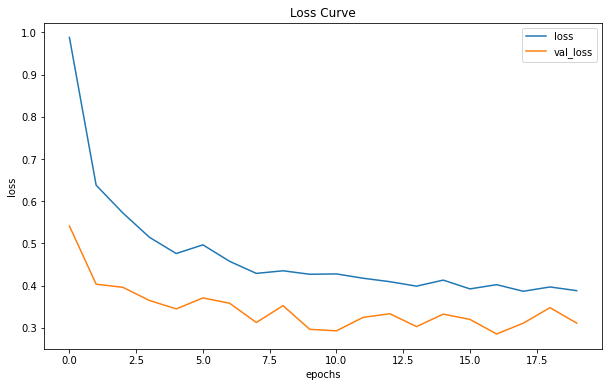

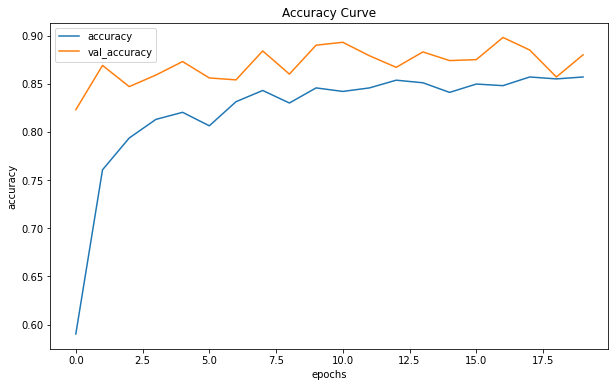

In [ ]:
plot_loss_metrics(history=history, metrics=['accuracy'], validation_metrics=True)

In [ ]:
# getting predictions from the model
y_true = []
y_pred = []

for features, labels in mini_test_data:
    y_true = np.concatenate([y_true, np.argmax(labels, axis=1)], axis=0)
    y_pred = np.concatenate([y_pred, model.predict(features, verbose=0).argmax(1)], axis=0)

In [ ]:
# Classification Report on the predictions
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=mini_test_data.class_names))

                precision    recall  f1-score   support

baby_back_ribs       0.88      0.81      0.84       250
       baklava       0.96      0.83      0.89       250
chocolate_cake       0.92      0.94      0.93       250
     prime_rib       0.79      0.94      0.86       250

      accuracy                           0.88      1000
     macro avg       0.89      0.88      0.88      1000
  weighted avg       0.89      0.88      0.88      1000



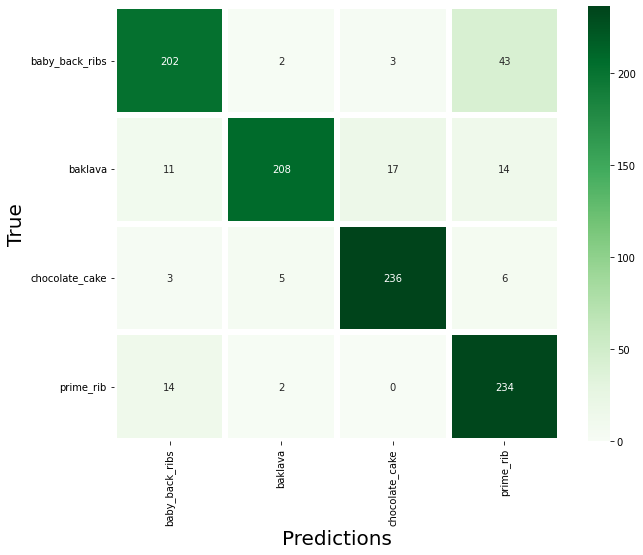

In [ ]:
# Confusion Matrix for the predictions
confusion_matrix_heatmap(y_true, y_pred, mini_train_data.class_names)

## Main Model

In [49]:
# number of classes
n_classes = 101

# all the labels
main_labels = os.listdir(os.path.join(data_dir, 'train'))

# epochs to train
EPOCHS = 7

In [46]:
# Main Training Set
main_train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE)

# Main Validation Set
main_test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                             image_size=IMG_SIZE,
                                                             label_mode='categorical',
                                                             batch_size=BATCH_SIZE)

Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


### Model Definition

In [ ]:
# inputs layer to the model
inputs = tf.keras.layers.Input(shape=IMG_SIZE+(COLOR_CHNLS,), name='input')

# inceptionv3 layers with the weights are frozen
base = tf.keras.applications.InceptionV3(include_top=False)
base.trainable = False

# model structure
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)

# output layer
outputs = tf.keras.layers.Dense(n_classes, activation='softmax', name='output')(x)

# model
model = tf.keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_avg_pooling (GlobalA  (None, 2048)             0         
 veragePooling2D)                                                
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 output (Dense)              (None, 101)               103525    
                                                           

### Callbacks

In [ ]:
# stores the model after every epoch only if validation accuracy increases
checkpoint = tf.keras.callbacks.ModelCheckpoint('Checkpoints/Incepv3',
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                initial_value_threshold=0.5,
                                                verbose=1)

In [ ]:
# stops training if validation loss hasn't decreased in the last 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3,
                                              verbose=1,
                                              restore_best_weights=True)

### Model Training

In [ ]:
history = model.fit(main_train_data,
                    epochs=EPOCHS,
                    steps_per_epoch=len(main_train_data),
                    validation_data=main_test_data,
                    validation_steps=len(main_test_data),
                    callbacks=[early_stop, checkpoint])

Epoch 1/7
2367/2368 [============================>.] - ETA: 0s - loss: 2.4791 - accuracy: 0.3892
Epoch 1: val_accuracy did not improve from 0.50000
2368/2368 [==============================] - 289s 120ms/step - loss: 2.4791 - accuracy: 0.3892 - val_loss: 1.9629 - val_accuracy: 0.4901
Epoch 2/7
2367/2368 [============================>.] - ETA: 0s - loss: 2.0629 - accuracy: 0.4749
Epoch 2: val_accuracy did not improve from 0.50000
2368/2368 [==============================] - 283s 119ms/step - loss: 2.0630 - accuracy: 0.4749 - val_loss: 1.9373 - val_accuracy: 0.4989
Epoch 3/7
2367/2368 [============================>.] - ETA: 0s - loss: 1.9106 - accuracy: 0.5093
Epoch 3: val_accuracy improved from 0.50000 to 0.50150, saving model to Checkpoints/Incepv3
2368/2368 [==============================] - 362s 153ms/step - loss: 1.9106 - accuracy: 0.5093 - val_loss: 1.9461 - val_accuracy: 0.5015
Epoch 4/7
2367/2368 [============================>.] - ETA: 0s - loss: 1.7952 - accuracy: 0.5347
Epoch 4

In [1]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('./Checkpoints/Incepv3')

### Model Evaluation

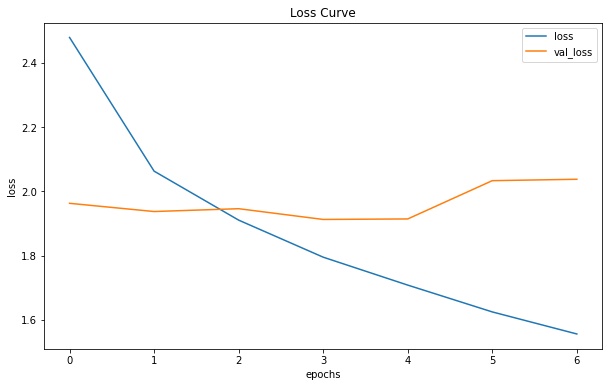

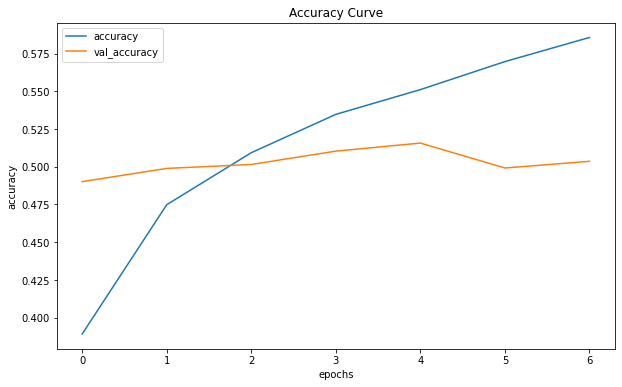

In [ ]:
plot_loss_metrics(history=history, metrics=['accuracy'], validation_metrics=True)

In [ ]:
# getting predictions from the model
y_true = []
y_pred = []

for features, labels in main_test_data:
    y_true = np.concatenate([y_true, np.argmax(labels, axis=1)], axis=0)
    y_pred = np.concatenate([y_pred, model.predict(features, verbose=0).argmax(1)], axis=0)

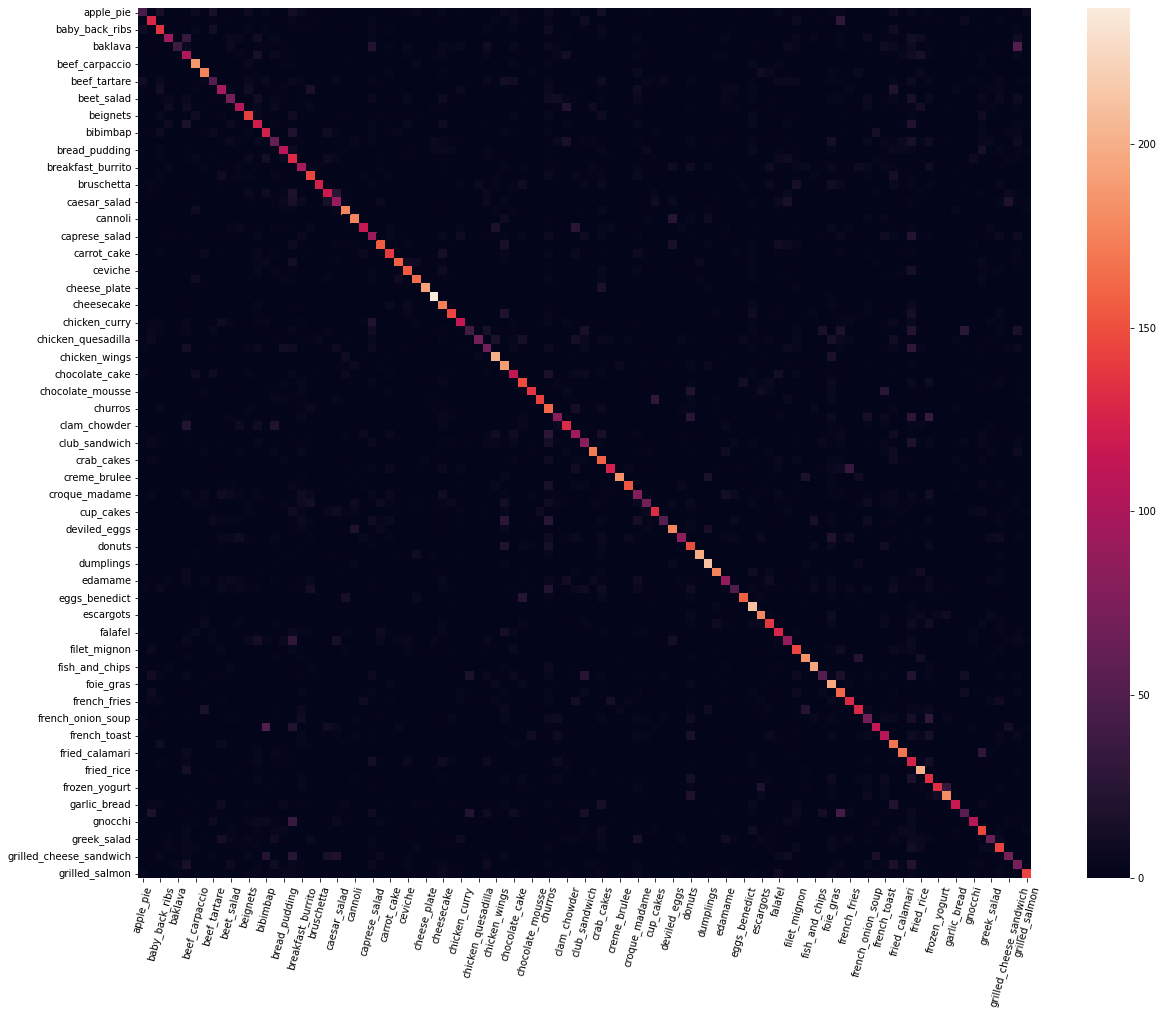

In [ ]:
# Confusion Matrix for the predictions
plt.figure(figsize=(20,16))
s = sns.heatmap(data=confusion_matrix(y_true, y_pred))
s.set_yticklabels(main_test_data.class_names);
s.set_xticklabels(main_test_data.class_names)
plt.xticks(rotation=75);
plt.yticks(rotation=0);

### Fine-Tuning the main model

In [18]:
model = load_model('./Checkpoints/Incepv3')

In [20]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_avg_pooling (GlobalA  (None, 2048)             0         
 veragePooling2D)                                                
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 output (Dense)              (None, 101)               103525    
                                                           

In [31]:
# setting the pretrained model to be trainable
model.layers[2].trainable = True

# how many layers does the pretrained model has
len(model.layers[2].layers)

311

In [32]:
model.layers[2].layers[-22:]

In [33]:
# setting the last 22 layers as trainable
for layer in model.layers[2].layers[:-22]:
  layer.trainable = False

In [34]:
for layer in model.layers[2].layers[-30:]:
  print(layer, ' ', layer.trainable)

<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f48fa0dd690>   False
<keras.layers.core.activation.Activation object at 0x7f48fa071c10>   False
<keras.layers.convolutional.Conv2D object at 0x7f48fa0734d0>   False
<keras.layers.convolutional.Conv2D object at 0x7f48fa079950>   False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f48fa080190>   False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f48fa087590>   False
<keras.layers.core.activation.Activation object at 0x7f48fa08c350>   False
<keras.layers.core.activation.Activation object at 0x7f48fa08cb90>   False
<keras.layers.convolutional.Conv2D object at 0x7f48fa091210>   True
<keras.layers.convolutional.Conv2D object at 0x7f48fa0956d0>   True
<keras.layers.convolutional.Conv2D object at 0x7f48fa098b50>   True
<keras.layers.convolutional.Conv2D object at 0x7f48fa09cfd0>   True
<keras.layers.pooling.AveragePooling2D object at 0x7f48fa0a215

In [35]:
for layer in model.layers:
  print(layer, ' ', layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f498bd60390>   True
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f490e3ca490>   True
<keras.engine.functional.Functional object at 0x7f498bb8e750>   True
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f490e1a6150>   True
<keras.layers.core.dense.Dense object at 0x7f490e1a6b90>   True
<keras.layers.core.dense.Dense object at 0x7f490e1b6e90>   True


In [39]:
# how many layers are trainable in the whole model
len(model.trainable_variables)

16

In [40]:
# compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [42]:
# callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=2,
                                              restore_best_weights=True,
                                              verbose=1)

checkpoint = tf.keras.callbacks.ModelCheckpoint('Checkpoints/FineTunedIncepv3',
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                initial_value_threshold=0.53,
                                                verbose=1)

In [50]:
fine_tuning_epochs = EPOCHS + 5

# fine tuning
finetune_history = model.fit(main_train_data,
                             epochs=fine_tuning_epochs,
                             initial_epoch=EPOCHS,
                             steps_per_epoch=len(main_train_data),
                             validation_data=main_test_data,
                             validation_steps=len(main_test_data),
                             callbacks=[early_stop, checkpoint])

Epoch 8/12
2368/2368 [==============================] - ETA: 0s - loss: 1.5448 - accuracy: 0.5937
Epoch 8: val_accuracy improved from 0.53000 to 0.57097, saving model to Checkpoints/FineTuned
2368/2368 [==============================] - 369s 156ms/step - loss: 1.5448 - accuracy: 0.5937 - val_loss: 1.6268 - val_accuracy: 0.5710
Epoch 9/12
2367/2368 [============================>.] - ETA: 0s - loss: 1.1650 - accuracy: 0.6852
Epoch 9: val_accuracy improved from 0.57097 to 0.58653, saving model to Checkpoints/FineTuned
2368/2368 [==============================] - 353s 149ms/step - loss: 1.1650 - accuracy: 0.6852 - val_loss: 1.6031 - val_accuracy: 0.5865
Epoch 10/12
2367/2368 [============================>.] - ETA: 0s - loss: 0.9055 - accuracy: 0.7543
Epoch 10: val_accuracy did not improve from 0.58653
2368/2368 [==============================] - 324s 136ms/step - loss: 0.9055 - accuracy: 0.7543 - val_loss: 1.6500 - val_accuracy: 0.5861
Epoch 11/12
2367/2368 [============================>.]

In [51]:
y_true = []
y_pred = []

for features, labels in main_test_data:
    y_true = np.concatenate([y_true, np.argmax(labels, axis=1)], axis=0)
    y_pred = np.concatenate([y_pred, model.predict(features, verbose=0).argmax(1)], axis=0)

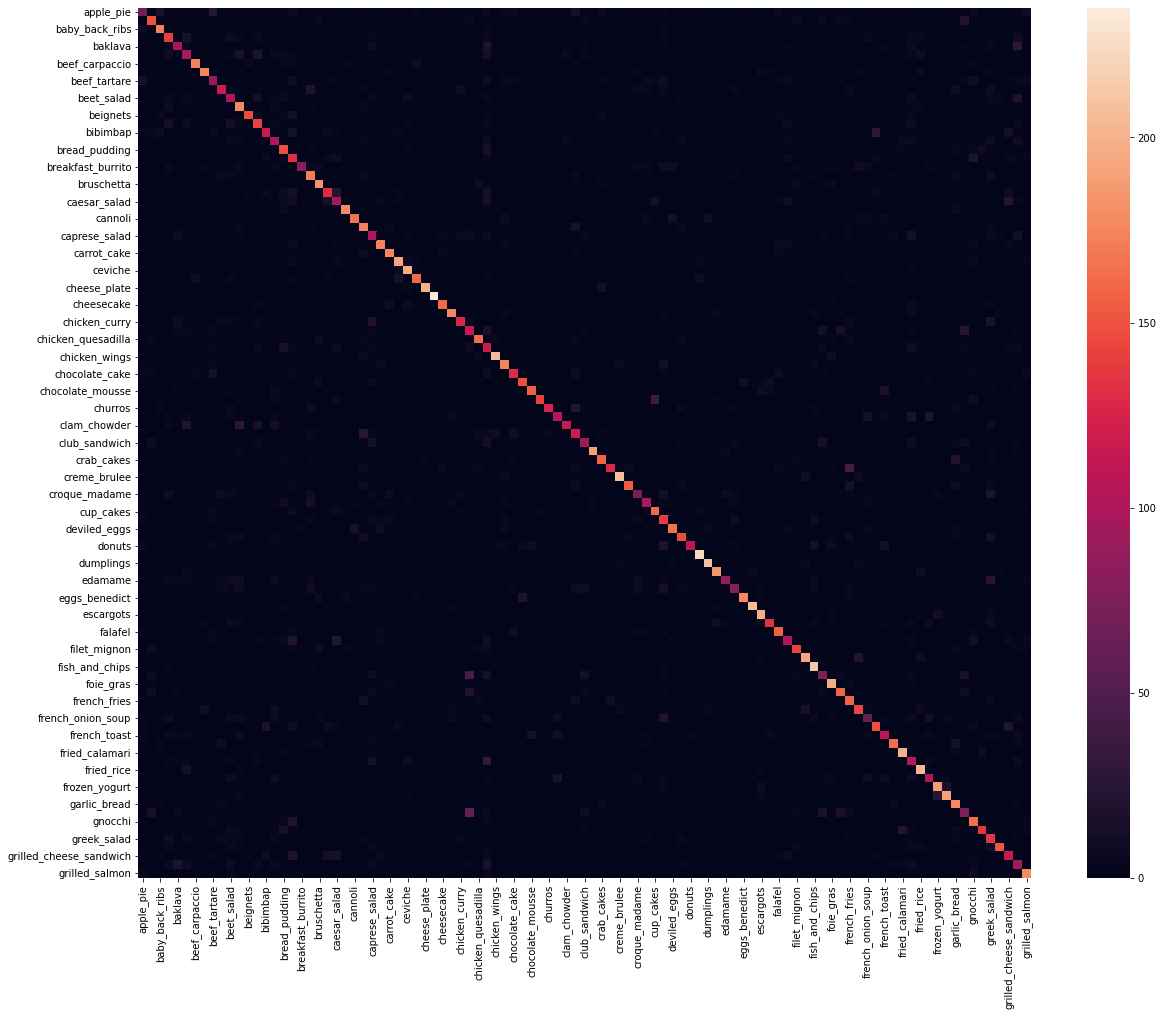

In [127]:
# Confusion Matrix for the predictions
plt.figure(figsize=(20,16))
s = sns.heatmap(data=confusion_matrix(y_true, y_pred))
s.set_yticklabels(main_test_data.class_names);
s.set_xticklabels(main_test_data.class_names)
plt.xticks(rotation=90);
plt.yticks(rotation=0);

#### Calculating top k accuracies

In [116]:
i = True

# retrieving the one hot encoded labels and predictions
for features, labels in main_test_data:
  if i:
    one_hot_true = labels
    softmax_pred = model.predict(features, verbose=0)
    i = False
  else:
    one_hot_true = np.concatenate([one_hot_true, labels], axis=0)
    softmax_pred = np.concatenate([softmax_pred, model.predict(features, verbose=0)], axis=0)

In [121]:
top_1 = tf.keras.metrics.TopKCategoricalAccuracy(k=1)
top_1.update_state(one_hot_true, softmax_pred)
top_1_accuracy = top_1.result().numpy()

In [122]:
top_1_accuracy

0.5865347

In [123]:
top_5 = tf.keras.metrics.TopKCategoricalAccuracy(k=5)
top_5.update_state(one_hot_true, softmax_pred)
top_5_accuracy = top_5.result().numpy()

In [128]:
top_5_accuracy

0.83726734